In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [121]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [117]:
len(words)

32033

In [123]:
Xtr.shape, Xtr.dtype, Ytr.shape, Ytr.dtype

(torch.Size([182437, 3]), torch.int64, torch.Size([182437]), torch.int64)

In [60]:
C = torch.randn((27, 2))

In [9]:
C[5]

tensor([-0.2737,  0.0563])

In [15]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [16]:
w1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [17]:
emb @ w1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [21]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [22]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [27]:
emb.shape

torch.Size([32, 3, 2])

In [28]:
emb.view(32, 6)

tensor([[-0.7898, -0.4003, -0.7898, -0.4003, -0.7898, -0.4003],
        [-0.7898, -0.4003, -0.7898, -0.4003, -0.2737,  0.0563],
        [-0.7898, -0.4003, -0.2737,  0.0563, -0.9380,  0.7740],
        [-0.2737,  0.0563, -0.9380,  0.7740, -0.9380,  0.7740],
        [-0.9380,  0.7740, -0.9380,  0.7740, -1.2888,  0.0260],
        [-0.7898, -0.4003, -0.7898, -0.4003, -0.7898, -0.4003],
        [-0.7898, -0.4003, -0.7898, -0.4003,  0.5453, -1.4262],
        [-0.7898, -0.4003,  0.5453, -1.4262,  0.4386,  0.8636],
        [ 0.5453, -1.4262,  0.4386,  0.8636, -1.0276,  0.6311],
        [ 0.4386,  0.8636, -1.0276,  0.6311,  0.4189,  0.4256],
        [-1.0276,  0.6311,  0.4189,  0.4256, -1.0276,  0.6311],
        [ 0.4189,  0.4256, -1.0276,  0.6311, -1.2888,  0.0260],
        [-0.7898, -0.4003, -0.7898, -0.4003, -0.7898, -0.4003],
        [-0.7898, -0.4003, -0.7898, -0.4003, -1.2888,  0.0260],
        [-0.7898, -0.4003, -1.2888,  0.0260,  0.4189,  0.4256],
        [-1.2888,  0.0260,  0.4189,  0.4

In [33]:
h = torch.tanh(emb.view(-1, 6) @ w1 + b1)

In [34]:
h

tensor([[ 0.8042,  0.7848, -0.0154,  ...,  0.0416, -0.0189, -0.8920],
        [ 0.7758,  0.5329,  0.6589,  ..., -0.4824, -0.1607, -0.9897],
        [ 0.9420,  0.8611, -0.9334,  ...,  0.9643, -0.8564, -0.7932],
        ...,
        [ 0.2154,  0.9994,  0.7851,  ..., -0.7638,  0.2621, -0.9713],
        [ 0.7305,  0.9601, -0.9967,  ...,  0.9985,  0.0817,  0.9913],
        [ 0.5233, -0.9516, -0.8593,  ...,  0.9940, -0.5573,  0.6645]])

In [35]:
h.shape

torch.Size([32, 100])

In [36]:
w2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [37]:
logits = h @ w2 + b2

In [38]:
logits.shape

torch.Size([32, 27])

In [39]:
counts = logits.exp()

In [40]:
prob = counts / counts.sum(1, keepdim=True)

In [41]:
prob.shape

torch.Size([32, 27])

In [44]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(12.9459)

In [93]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
w1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
w2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, w1, b1, w2, b2]

In [62]:
sum(p.nelement() for p in parameters)

3481

In [50]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
logits = h @ w2 + b2
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdim=True)
# loss = -prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Y)
loss

tensor(17.7697)

In [94]:
for p in parameters:
  p.requires_grad = True

In [65]:
for _ in range (10):
  # forward
  emb = C[X]
  h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
  logits = h @ w2 + b2
  loss = F.cross_entropy(logits, Y)
  print(loss.item())
  # backward
  for p in parameters:
    p.grad = None
  loss.backward()
  # update
  for p in parameters:
    p.data += -0.1 * p.grad
# print(loss.item())

5.228204250335693
5.165928840637207
5.105469226837158
5.046748161315918
4.9897003173828125
4.934262275695801
4.880381107330322
4.828006744384766
4.777096271514893
4.727610111236572


In [86]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [95]:
lri = []
lossi = []

for i in range (1000):

  # minibatch construct
  ix = torch.randint(0, X.shape[0], (32,))

  # forward
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
  logits = h @ w2 + b2
  loss = F.cross_entropy(logits, Y[ix])
  print(loss.item())
  # backward
  for p in parameters:
    p.grad = None
  loss.backward()
  # update
  lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad
  # track stats
  lri.append(lre[i])
  lossi.append(loss.item())
  
# print(loss.item())

18.190725326538086
16.9769229888916
19.8826961517334
17.442588806152344
20.98873519897461
20.365432739257812
18.893051147460938
19.398515701293945
18.168582916259766
21.828290939331055
21.238779067993164
15.2960786819458
18.58281898498535
19.2113094329834
19.922164916992188
16.166780471801758
19.146020889282227
19.280132293701172
18.364465713500977
21.397083282470703
20.85274314880371
17.909011840820312
16.688892364501953
20.112939834594727
19.256576538085938
17.968271255493164
20.57924461364746
16.027029037475586
18.545238494873047
17.58631134033203
18.397266387939453
20.496171951293945
16.41069793701172
17.658329010009766
19.127792358398438
19.57280921936035
20.274677276611328
18.8496150970459
18.11639976501465
17.306264877319336
16.880020141601562
18.955217361450195
17.67274284362793
18.801925659179688
18.82311248779297
17.388036727905273
19.79022216796875
18.072023391723633
17.64376449584961
19.24973487854004
16.776988983154297
16.201332092285156
20.435270309448242
19.5024776458740

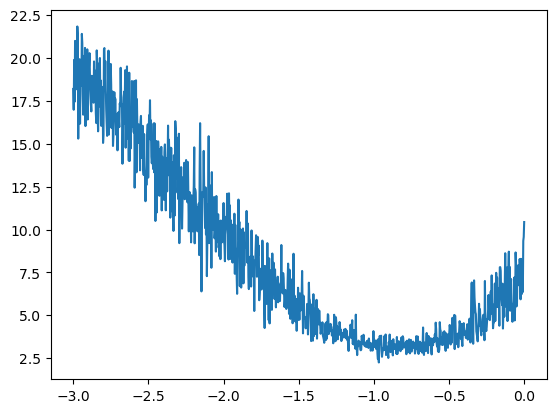

In [96]:
plt.plot(lri, lossi)

In [83]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.5825, grad_fn=<NllLossBackward0>)

In [176]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
w1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
w2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, w1, b1, w2, b2]

for p in parameters:
  p.requires_grad = True

In [177]:
sum(p.nelement() for p in parameters)

11897

In [178]:
lri = []
lossi = []
stepi = []

In [179]:
for i in range (200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 30) @ w1 + b1)
  logits = h @ w2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())
  # backward
  for p in parameters:
    p.grad = None
  loss.backward()
  # update
  # lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad
  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())
  
print(loss.item())

2.213895797729492


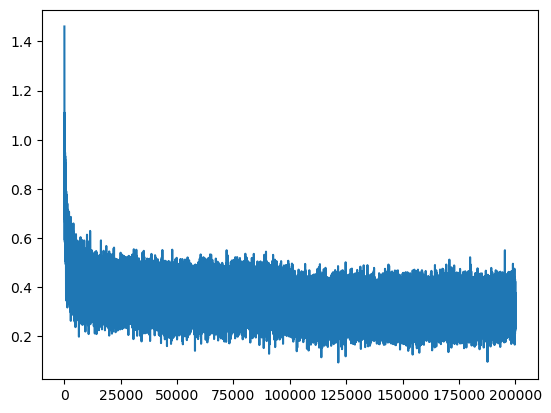

In [180]:
plt.plot(stepi, lossi)

In [181]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1169, grad_fn=<NllLossBackward0>)

In [182]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1771, grad_fn=<NllLossBackward0>)

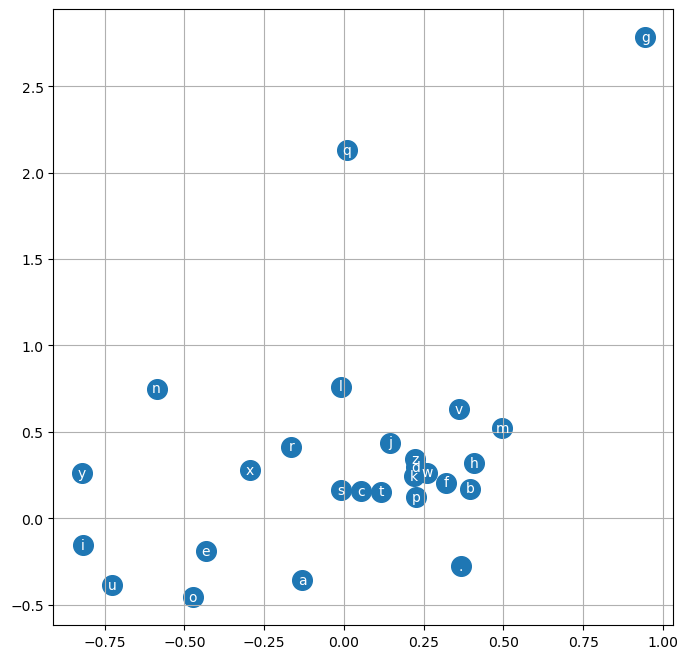

In [153]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [185]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size
    while True:
      emb = C[torch.tensor([context])]
      h = torch.tanh(emb.view(1, -1) @ w1 + b1)
      logits = h @ w2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))


carman.
amille.
khy.
myli.
taty.
halaysa.
jazhukwulpelynchianni.
ner.
kiah.
maiiv.
kaleigh.
ham.
poce.
quint.
shoesma.
vid.
quis.
trogiearyxin.
kaelynn.
delen.
